<a href="https://colab.research.google.com/github/mzaoualim/Coursera_IBM_Machine_Learning_Professional_Certificate/blob/main/Supervised%2520Machine%2520Learning%3A%2520Regression/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This notebook is the project-course of coursera "Supervised Machine Learning: Regression".

The aim of the project is to apply a variety of regression model to predict a target value.

## Data Source
We'll be using the [Ames Housing Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) for the training and testing the models.

A version of this dataset is provided by Coursera and hosted in this [link](https://github.com/mzaoualim/Coursera_IBM_Machine_Learning_Professional_Certificate/blob/main/Supervised%20Machine%20Learning:%20Regression/Ames_Housing_Sales.csv).

# Exploratory Data Analysis (EDA)

## Data Description

A detailed desciption is presented [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=data_description.txt).

In this section, we'll be providing a brief description of key features.

In [ ]:
# Loading Dataset
import pandas as pd
pd.set_option('display.max_columns', None) # To display all columns
pd.set_option('display.max_rows', None) # To display all rows
data = pd.read_csv('/content/Ames_Housing_Sales.csv')

In [ ]:
#First glance at data
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1,0,Gd,150.0,Y,Norm,Norm,SBrkr,0.0,TA,Gd,VinylSd,VinylSd,None,None,0,PConc,2,Typ,548.0,2,TA,RFn,TA,Attchd,2003.0,1710.0,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,8450.0,Inside,65.0,Reg,0.0,60,RL,196.0,BrkFace,None,0.0,2,CollgCr,61.0,5,7,Y,0.0,None,CompShg,Gable,Normal,WD,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0,1,Gd,284.0,Y,Feedr,Norm,SBrkr,0.0,TA,TA,MetalSd,MetalSd,None,TA,1,CBlock,2,Typ,460.0,2,TA,RFn,TA,Attchd,1976.0,1262.0,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,9600.0,FR2,80.0,Reg,0.0,20,RL,0.0,None,None,0.0,5,Veenker,0.0,8,6,Y,0.0,None,CompShg,Gable,Normal,WD,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1,0,Gd,434.0,Y,Norm,Norm,SBrkr,0.0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,608.0,2,TA,RFn,TA,Attchd,2001.0,1786.0,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,11250.0,Inside,68.0,IR1,0.0,60,RL,162.0,BrkFace,None,0.0,9,CollgCr,42.0,5,7,Y,0.0,None,CompShg,Gable,Normal,WD,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1,0,TA,540.0,Y,Norm,Norm,SBrkr,272.0,TA,TA,Wd Sdng,Wd Shng,None,Gd,1,BrkTil,1,Typ,642.0,3,TA,Unf,TA,Detchd,1998.0,1717.0,0,GasA,Gd,2Story,1,Gd,Lvl,Gtl,9550.0,Corner,60.0,IR1,0.0,70,RL,0.0,None,None,0.0,2,Crawfor,35.0,5,7,Y,0.0,None,CompShg,Gable,Abnorml,WD,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1,0,Gd,490.0,Y,Norm,Norm,SBrkr,0.0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,836.0,3,TA,RFn,TA,Attchd,2000.0,2198.0,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,14260.0,FR2,84.0,IR1,0.0,60,RL,350.0,BrkFace,None,0.0,12,NoRidge,84.0,5,8,Y,0.0,None,CompShg,Gable,Normal,WD,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [ ]:
# Data Shape
print('The data contrains:\n', data.shape[0], ' lines.\n', data.shape[1], ' columns.')

The data contrains:
 1379  lines.
 80  columns.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1379 non-null   float64
 1   2ndFlrSF       1379 non-null   float64
 2   3SsnPorch      1379 non-null   float64
 3   Alley          1379 non-null   object 
 4   BedroomAbvGr   1379 non-null   int64  
 5   BldgType       1379 non-null   object 
 6   BsmtCond       1379 non-null   object 
 7   BsmtExposure   1379 non-null   object 
 8   BsmtFinSF1     1379 non-null   float64
 9   BsmtFinSF2     1379 non-null   float64
 10  BsmtFinType1   1379 non-null   object 
 11  BsmtFinType2   1379 non-null   object 
 12  BsmtFullBath   1379 non-null   int64  
 13  BsmtHalfBath   1379 non-null   int64  
 14  BsmtQual       1379 non-null   object 
 15  BsmtUnfSF      1379 non-null   float64
 16  CentralAir     1379 non-null   object 
 17  Condition1     1379 non-null   object 
 18  Conditio

As mensionned above, the '1379 non-null' is the absence of missing data in our data set, which is great!

In [ ]:
# re-checking for null values
data.isnull().sum()

1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
Alley            0
BedroomAbvGr     0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtFinType1     0
BsmtFinType2     0
BsmtFullBath     0
BsmtHalfBath     0
BsmtQual         0
BsmtUnfSF        0
CentralAir       0
Condition1       0
Condition2       0
Electrical       0
EnclosedPorch    0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
Fence            0
FireplaceQu      0
Fireplaces       0
Foundation       0
FullBath         0
Functional       0
GarageArea       0
GarageCars       0
GarageCond       0
GarageFinish     0
GarageQual       0
GarageType       0
GarageYrBlt      0
GrLivArea        0
HalfBath         0
Heating          0
HeatingQC        0
HouseStyle       0
KitchenAbvGr     0
KitchenQual      0
LandContour      0
LandSlope        0
LotArea          0
LotConfig        0
LotFrontage      0
LotShape         0
LowQualFinSF     0
MSSubClass  

In [ ]:
# re-checking for missing values
data.isna().sum()

1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
Alley            0
BedroomAbvGr     0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtFinType1     0
BsmtFinType2     0
BsmtFullBath     0
BsmtHalfBath     0
BsmtQual         0
BsmtUnfSF        0
CentralAir       0
Condition1       0
Condition2       0
Electrical       0
EnclosedPorch    0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
Fence            0
FireplaceQu      0
Fireplaces       0
Foundation       0
FullBath         0
Functional       0
GarageArea       0
GarageCars       0
GarageCond       0
GarageFinish     0
GarageQual       0
GarageType       0
GarageYrBlt      0
GrLivArea        0
HalfBath         0
Heating          0
HeatingQC        0
HouseStyle       0
KitchenAbvGr     0
KitchenQual      0
LandContour      0
LandSlope        0
LotArea          0
LotConfig        0
LotFrontage      0
LotShape         0
LowQualFinSF     0
MSSubClass  

## Correlation Analysis

In [ ]:
#categorical columns
data_cat = data.select_dtypes(include = ['object'])
#numericla columns
data_num = data.select_dtypes(include = ['int64', 'float64'])

In [ ]:
data_num.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold', 'SalePrice'],
      dtype='object')

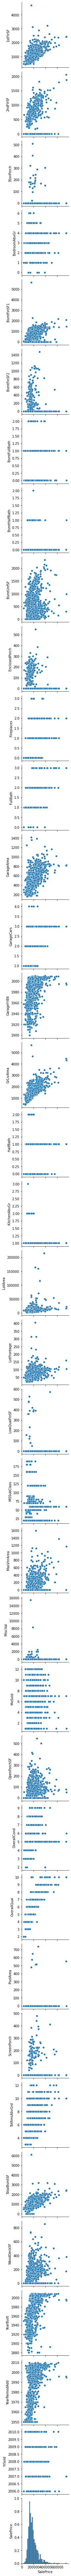

In [ ]:
#Correlation between numerical columns and Sale Price
#visual inspection using seaborn pairplot
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data=data_num,
             x_vars=['SalePrice'],
             y_vars=data_num.columns,
             height=3)

In [ ]:
#Calculating correlation
data_num.corrwith(data_num['SalePrice'])

1stFlrSF         0.594935
2ndFlrSF         0.313336
3SsnPorch        0.039226
BedroomAbvGr     0.164655
BsmtFinSF1       0.375563
BsmtFinSF2      -0.023243
BsmtFullBath     0.225988
BsmtHalfBath    -0.025651
BsmtUnfSF        0.213135
EnclosedPorch   -0.120164
Fireplaces       0.448877
FullBath         0.556550
GarageArea       0.608405
GarageCars       0.637095
GarageYrBlt      0.486362
GrLivArea        0.708172
HalfBath         0.270721
KitchenAbvGr    -0.135574
LotArea          0.252921
LotFrontage      0.281976
LowQualFinSF    -0.008364
MSSubClass      -0.077707
MasVnrArea       0.463139
MiscVal         -0.017933
MoSold           0.043749
OpenPorchSF      0.333036
OverallCond     -0.095278
OverallQual      0.787228
PoolArea         0.091518
ScreenPorch      0.099453
TotRmsAbvGrd     0.538309
TotalBsmtSF      0.603583
WoodDeckSF       0.312631
YearBuilt        0.507584
YearRemodAdd     0.505434
YrSold          -0.026726
SalePrice        1.000000
dtype: float64

# Feature Engineering

## Feature choice

In this exercice, we'll start with numerical variable with absolute correlation is greater than .5

In [ ]:
# Selecting features with high correlation
corr_table = data_num.corrwith(data_num['SalePrice']).sort_values(ascending = False)
corr_table

SalePrice        1.000000
OverallQual      0.787228
GrLivArea        0.708172
GarageCars       0.637095
GarageArea       0.608405
TotalBsmtSF      0.603583
1stFlrSF         0.594935
FullBath         0.556550
TotRmsAbvGrd     0.538309
YearBuilt        0.507584
YearRemodAdd     0.505434
GarageYrBlt      0.486362
MasVnrArea       0.463139
Fireplaces       0.448877
BsmtFinSF1       0.375563
OpenPorchSF      0.333036
2ndFlrSF         0.313336
WoodDeckSF       0.312631
LotFrontage      0.281976
HalfBath         0.270721
LotArea          0.252921
BsmtFullBath     0.225988
BsmtUnfSF        0.213135
BedroomAbvGr     0.164655
ScreenPorch      0.099453
PoolArea         0.091518
MoSold           0.043749
3SsnPorch        0.039226
LowQualFinSF    -0.008364
MiscVal         -0.017933
BsmtFinSF2      -0.023243
BsmtHalfBath    -0.025651
YrSold          -0.026726
MSSubClass      -0.077707
OverallCond     -0.095278
EnclosedPorch   -0.120164
KitchenAbvGr    -0.135574
dtype: float64

Apparently,with the exception of years relative features, only 8 numerical features are highly correlated with 'Sale Price'.
So, we'll be left with the following features are independent variables.

In [ ]:
# List of the independent variables:
list_X = corr_table[1:9][:].index.to_list()
list_X

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd']

In [ ]:
list_Y = ['SalePrice']

## Feature transformation

By assuming a linear relationship between a set of independent variable and a dependent variable, we accept that all these variables are normally distributed. let's check this hypothesis.



In [ ]:
# Visual inspection of normal distribution:
X = data_num[list_X] # independent variable
Y = data_num[list_Y] # dependent variable

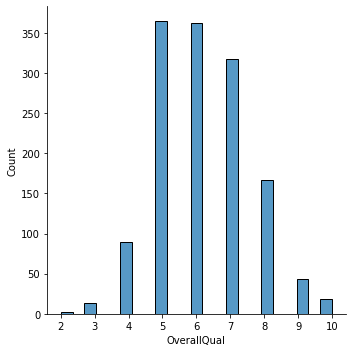

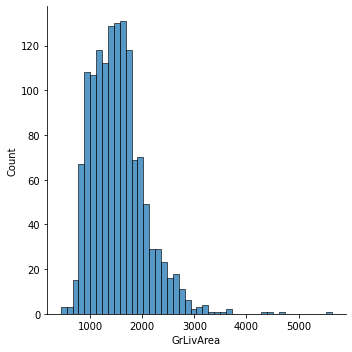

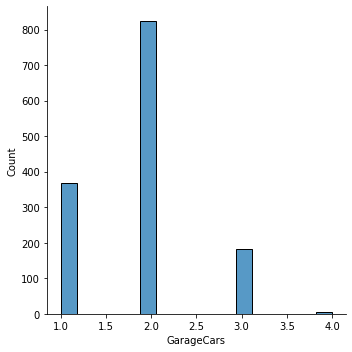

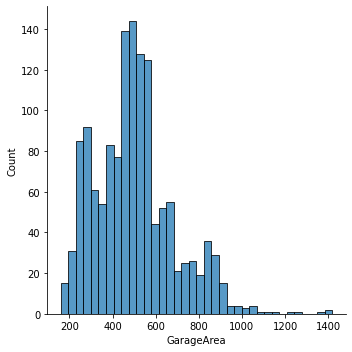

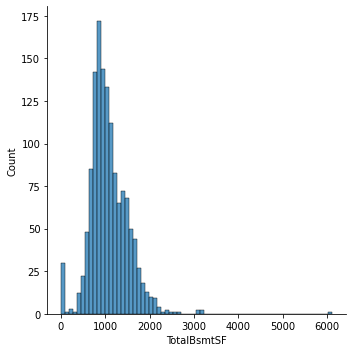

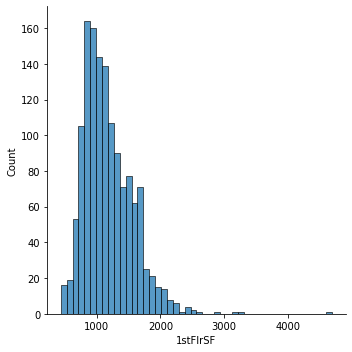

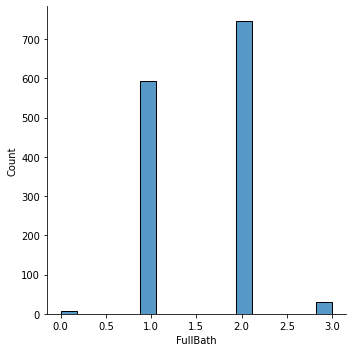

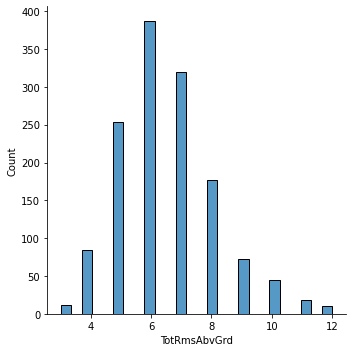

In [ ]:
# distribution plots of the independent variables
for c in X.columns:
  sns.displot(X[c])

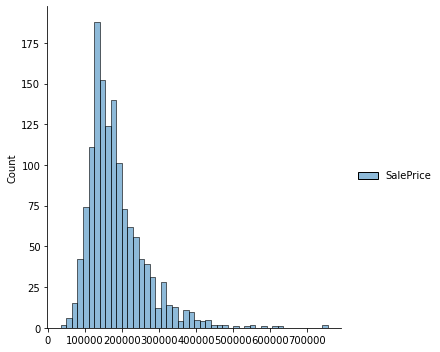

In [ ]:
# distribution plots of the dependent varialble
sns.displot(Y)

A better analytical approach is to mesure the skewness of the distribution as follow:

In [ ]:
#skewness for independent variables
X.skew().sort_values()

FullBath       -0.015812
GarageCars      0.194080
OverallQual     0.288081
TotRmsAbvGrd    0.671629
GarageArea      0.811037
1stFlrSF        1.390283
GrLivArea       1.411296
TotalBsmtSF     1.621602
dtype: float64

In [ ]:
#skewness for dependent variable
Y.skew()

SalePrice    1.935362
dtype: float64

By adopting a threshold of (-.5, .5), all our variables are skewed with exception of:
*   OverallQual
*   GarageCars
*   FullBath

A feature transformation is needed to normalize these distribution.

Let's start with applying log function:






In [ ]:
# normalizing the dependent variable:
import numpy as np
log_y = pd.DataFrame(np.log(Y), columns = list_Y)
log_y.skew()

SalePrice    0.290157
dtype: float64

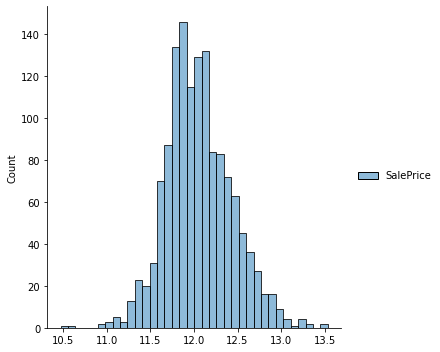

In [ ]:
# new normalized dependent variable
sns.displot(log_y)

In [ ]:
# normalizing the independent variable:
log_x = pd.DataFrame(np.log(X),
                     columns = list_X)
log_x.skew().sort_values()

GarageCars     -0.492308
OverallQual    -0.416034
GarageArea     -0.250541
TotRmsAbvGrd   -0.112067
GrLivArea       0.063691
1stFlrSF        0.104736
TotalBsmtSF          NaN
FullBath             NaN
dtype: float64

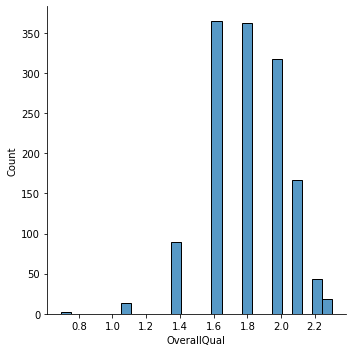

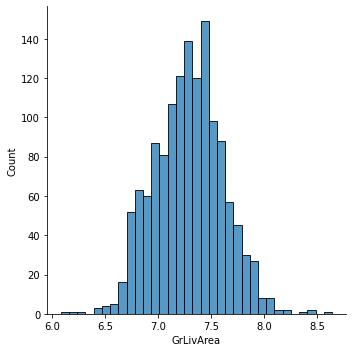

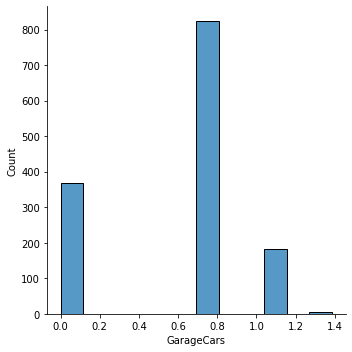

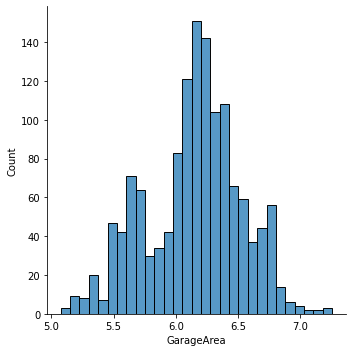

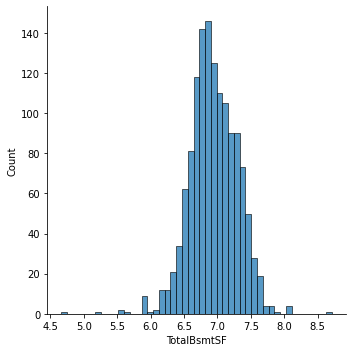

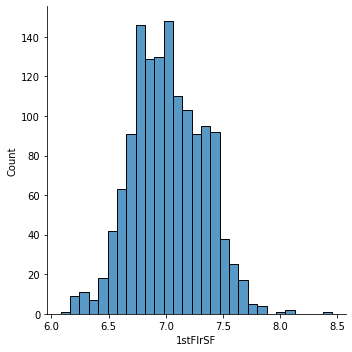

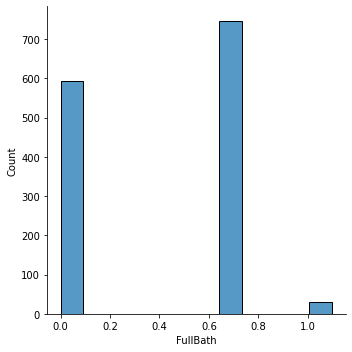

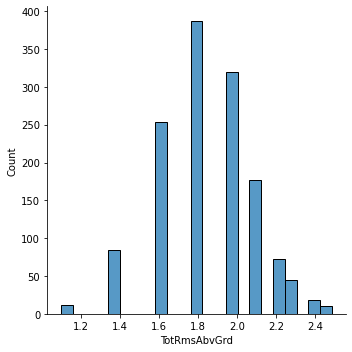

In [ ]:
# new normalized independent variable
for c in log_x.columns:
  sns.displot(log_x[c])

Ok, Our data seems to be ready to feed it to our model.

# Model selection

Even with limiting our supposed relation-ship between features and 'Sale Price', we are in the face of multiple models to choose from, each with multiple parameters to tune.

In this case, we'll be using GridSearchCV tool from SciKitLearn package to go through, multiples models and parameters to select the best combination of model and parameters to use for best results.

## Introduction to GridSearch

As defined in the [official website](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), GridSearchCV is "Exhaustive search over specified parameter values for an estimator".

## Modeling

We'll try three models:



1.   Linear Regression
2.   LASSO regression
3.   RIDGE regression

All implemented in GridSearchCV package, each with differents parameters to simulate in order to choose the best estimator-parameters combination.

The data we'll be scaled and split into:


*   70% training set
*   30% test set






In [ ]:
# Replacing -inf with zero
#locating inf values
np.isfinite(log_x).sum()

OverallQual     1379
GrLivArea       1379
GarageCars      1379
GarageArea      1379
TotalBsmtSF     1349
1stFlrSF        1379
FullBath        1371
TotRmsAbvGrd    1379
dtype: int64

In [ ]:
log_x.replace(-np.inf, 0, inplace=True)

In [ ]:
# re-Checking
np.isfinite(log_x).sum()

OverallQual     1379
GrLivArea       1379
GarageCars      1379
GarageArea      1379
TotalBsmtSF     1379
1stFlrSF        1379
FullBath        1379
TotRmsAbvGrd    1379
dtype: int64

In [ ]:
log_x.min()

OverallQual     0.693147
GrLivArea       6.082219
GarageCars      0.000000
GarageArea      5.075174
TotalBsmtSF     0.000000
1stFlrSF        6.082219
FullBath        0.000000
TotRmsAbvGrd    1.098612
dtype: float64

In [ ]:
#Scaling Data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(log_x)
Y = StandardScaler().fit_transform(log_y)

#Data split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = .3,
                                                    random_state=42)

In [ ]:
x_train.shape, y_train.shape

((965, 8), (965, 1))

In [ ]:
skew(y_train)

NameError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV

param_lr = {'fit_intercept': (True, False),
            'positive': (True, False)}
              
param_rr = {'alpha' : (np.arange(1, 30, 1)),
            'fit_intercept': (True, False)}

param_rl = {'alpha' : (np.arange(0.001, 1, 0.0001)),
            'fit_intercept': (True, False)}


grid_lr = GridSearchCV(LinearRegression(), param_grid=param_lr, n_jobs=-1, cv =10)
grid_lr.fit(x_train, y_train)
print('Linear Regression best parameters: \n', grid_lr.best_params_, 
      'Linear Regression best Score: \n', grid_lr.best_score_)

grid_rr = GridSearchCV(Ridge(), param_grid=param_rr, n_jobs=-1, cv =10)
grid_rr.fit(x_train, y_train)
print('Ridge Regression best parameters: \n',grid_rr.best_params_, 
      'Ridge Regression best Score: \n', grid_rr.best_score_)

grid_rl = GridSearchCV(Lasso(), param_grid=param_rl, n_jobs=-1, cv =10)
grid_rl.fit(x_train, y_train)
print('Lasso Regression best parameters: \n', grid_rl.best_params_, 
      'Lasso Regression best Score: \n', grid_rl.best_score_)
    


Linear Regression best parameters: 
 {'fit_intercept': False, 'positive': True} Linear Regression best Score: 
 0.7928219874119158
Ridge Regression best parameters: 
 {'alpha': 24, 'fit_intercept': False} Ridge Regression best Score: 
 0.7930618617693618
Ridge Regression best parameters: 
 {'alpha': 0.007700000000000003, 'fit_intercept': False} Ridge Regression best Score: 
 0.7929042587445838


# Data Analytics

So, with only 8 features out off 84, we can reach an R² of 79% with is remarkable.

Let's test these models on our test set

In [ ]:
# Testing
print('Linear regression test score: ',grid_lr.score(x_test, y_test),'\n',
      'Ridge regression test score: ', grid_rr.score(x_test, y_test),'\n',
      'Lasso regression test score: ', grid_rl.score(x_test, y_test),'\n',)

Linear regression test score:  0.7565099310696599 
 Ridge regression test score:  0.7564514845565067 
 Lasso regression test score:  0.7573662104239758 



## Feature importance

Now, let's have a look at the contribution of each feature to the predictive effort for each model:

Text(0.5, 1.0, 'Linear Regression')

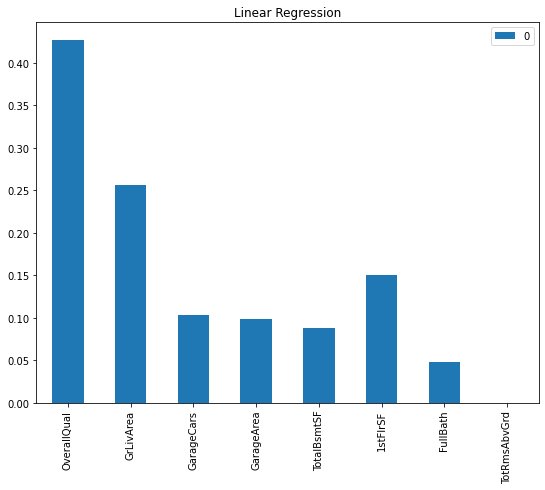

In [ ]:
from matplotlib import pyplot
# Linear Regression Feature importance:

coefs_lr = pd.DataFrame(
   grid_lr.best_estimator_.coef_.T,
   index=log_x.columns)

coefs_lr.plot(kind='bar', figsize=(9, 7))
plt.title('Linear Regression')


Text(0.5, 1.0, 'Ridge Regression')

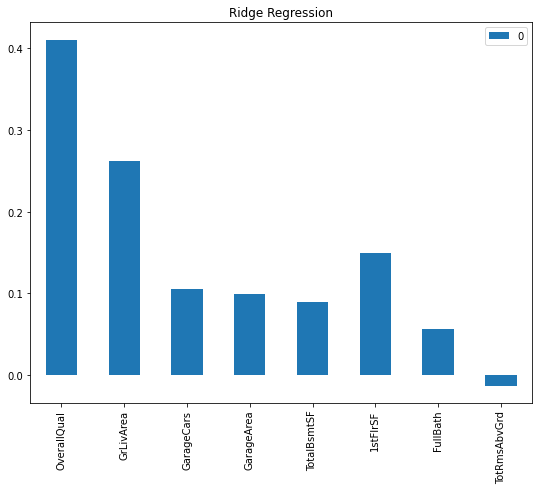

In [ ]:
# Ridge Regression Feature importance:
coefs_rr = pd.DataFrame(
   grid_rr.best_estimator_.coef_.T,
   index=log_x.columns)

coefs_rr.plot(kind='bar', figsize=(9, 7))
plt.title('Ridge Regression')

Text(0.5, 1.0, 'Lasso Regression')

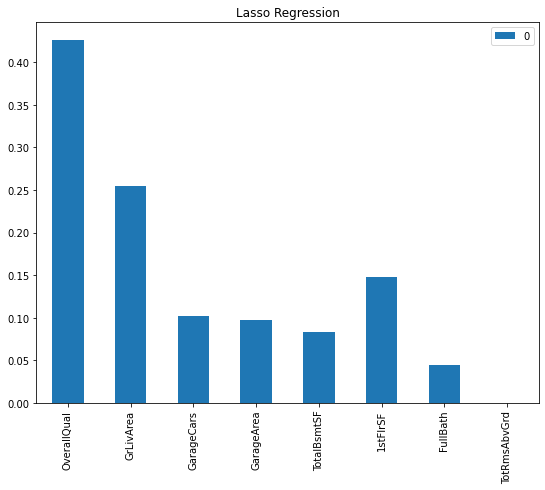

In [ ]:
# Lasso Regression Feature importance:
coefs_rl = pd.DataFrame(grid_rl.best_estimator_.coef_.T,
                        index=log_x.columns)

coefs_rl.plot(kind='bar', figsize=(9, 7))
plt.title('Lasso Regression')

# Conclusion

As presented in the previous plots, two mains features contribute the most to the predictive effort, which are:

- OverallQual with almost 50%
- GrLivArea with roughly 25%.

This simpl model can achieve a 75% prediction accuracy, with only numerical values.

A good attempt is to try:

- incorporate some categorical variable to inhance the predictive power.
- additionnal polynominal transformation and interaction between numerical feature could be helpful.

That's it for this notebook, hope the [hear](mohamed.mzaouali@gmail.com) from you soon.
